<a href="https://colab.research.google.com/github/LTNhoTin/MyProject/blob/main/Assigment_ML_ADY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
csv_file_path = '/content/drive/MyDrive/CARDIO_TRAIN.csv'
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv(csv_file_path)


In [83]:
corr = df.corr().CARDIO.sort_values(ascending=False)
corr

CARDIO         1.000000
AGE            0.237985
CHOLESTEROL    0.221147
WEIGHT         0.181659
GLUC           0.089307
AP_LO          0.065719
AP_HI          0.054475
GENDER         0.008109
Unnamed: 0     0.003800
ID             0.003799
ALCO          -0.007330
HEIGHT        -0.010821
SMOKE         -0.015486
ACTIVE        -0.035653
Name: CARDIO, dtype: float64

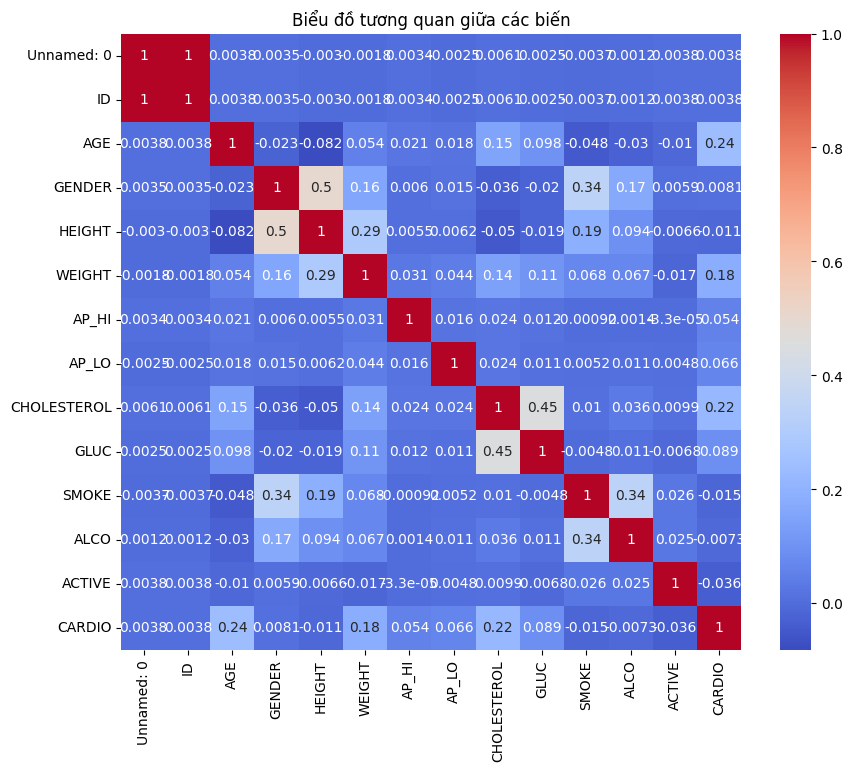

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ heatmap hiển thị tương quan giữa các biến
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Biểu đồ tương quan giữa các biến")
plt.show()


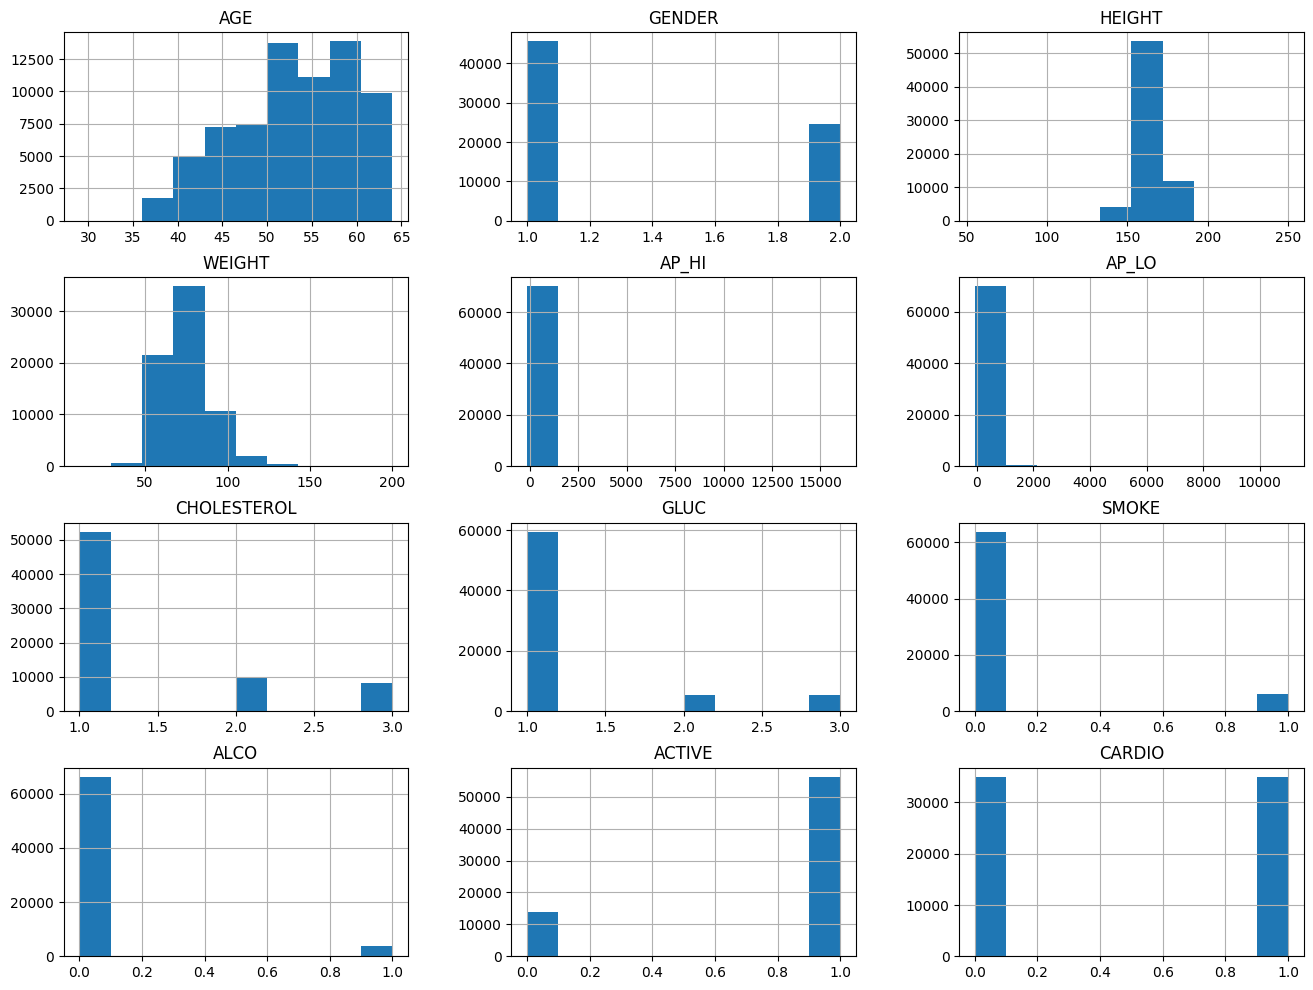

In [85]:
# Vẽ biểu đồ histogram cho từng biến
df[['AGE','GENDER','HEIGHT','WEIGHT','AP_HI','AP_LO','CHOLESTEROL','GLUC','SMOKE','ALCO','ACTIVE','CARDIO']].hist(figsize=(16, 12))
plt.show()


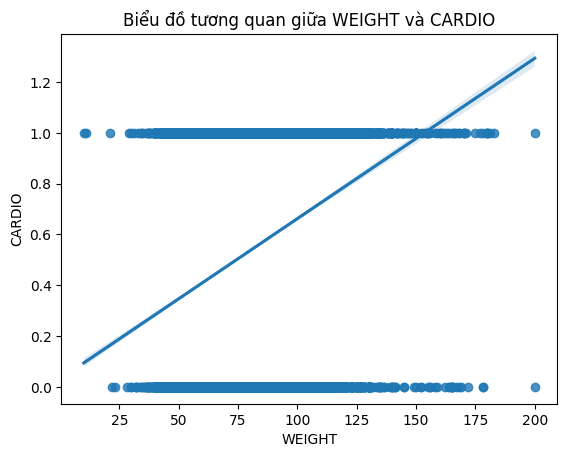

In [86]:
# Sử dụng regplot để biểu diễn mối tương quan giữa WEIGHT và CARDIO
sns.regplot(x="WEIGHT", y="CARDIO", data=df, dropna=True)
plt.xlabel('WEIGHT')
plt.ylabel('CARDIO')
plt.title("Biểu đồ tương quan giữa WEIGHT và CARDIO")
plt.show()


In [99]:

def handle_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column_name] = df[column_name].apply(lambda x: min(upper_bound, max(x, lower_bound)))

# Xử lý dữ liệu ngoại lai cho AP_HI
handle_outliers(df, "AP_HI")

# Xử lý dữ liệu ngoại lai cho AP_LO
handle_outliers(df, "AP_LO")


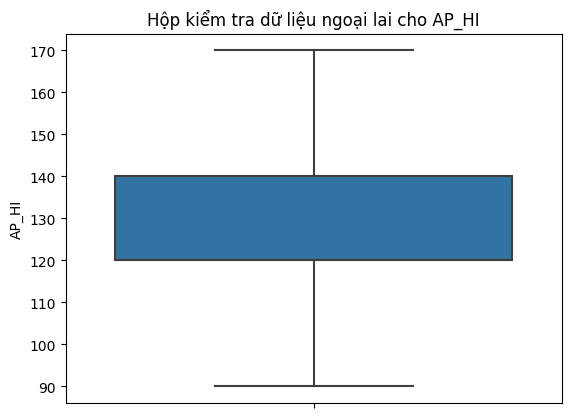

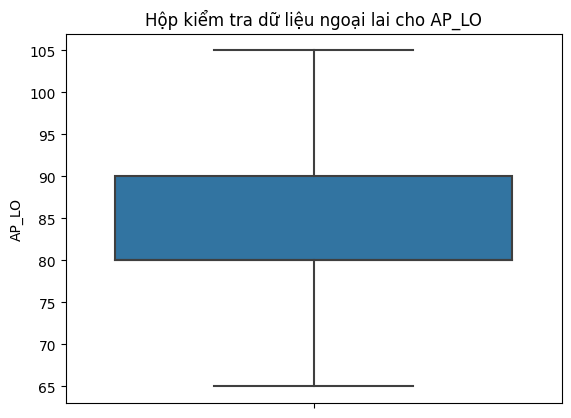

In [100]:
# Hộp kiểm tra dữ liệu ngoại lai cho AP_HI
sns.boxplot(y="AP_HI", data=df)
plt.title("Hộp kiểm tra dữ liệu ngoại lai cho AP_HI")
plt.show()

# Hộp kiểm tra dữ liệu ngoại lai cho AP_LO
sns.boxplot(y="AP_LO", data=df)
plt.title("Hộp kiểm tra dữ liệu ngoại lai cho AP_LO")
plt.show()


In [89]:
from scipy.stats import f_oneway, levene, ttest_ind, pearsonr, chi2_contingency

# Kiểm tra mối quan hệ giữa CHOLESTEROL và bệnh tim bằng kiểm định ANOVA
cholesterol_groups = [df[df['CHOLESTEROL'] == i].CARDIO for i in [1, 2, 3]]
f_statistic, p_value = f_oneway(*cholesterol_groups)
print("Kết quả kiểm định ANOVA:", f_statistic, "p-value:", p_value)

# Kiểm tra mối quan hệ giữa AGE và bệnh tim bằng kiểm định Levene và kiểm định T
lower_age_group = df[df.AGE < df.AGE.mean()].CARDIO
higher_age_group = df[df.AGE >= df.AGE.mean()].CARDIO
f_statistic, p_value = levene(lower_age_group, higher_age_group)
print("Kết quả kiểm định Levene:", f_statistic, "p-value:", p_value)

t_statistic, t_p_value = ttest_ind(lower_age_group, higher_age_group, equal_var=p_value > 0.05)
print("Kết quả kiểm định T:", t_statistic, "p-value:", t_p_value)

# Kiểm tra mối quan hệ giữa WEIGHT và bệnh tim bằng hệ số tương quan Pearson
coeff, p_value = pearsonr(df.WEIGHT, df.CARDIO)
print("Kết quả kiểm định tương quan Pearson:", coeff, "p-value:", p_value)

# Kiểm tra mối quan hệ giữa ALCOHOL và bệnh tim bằng kiểm định chi-square
cont_table = pd.crosstab(df.ALCO, df.CARDIO)
chi2_stat, chi2_p, _, _ = chi2_contingency(cont_table)
print("Kết quả kiểm định chi-squared:", chi2_stat, "p-value:", chi2_p)



Kết quả kiểm định ANOVA: 1799.6607856699602 p-value: 0.0
Kết quả kiểm định Levene: 33.0528177142689 p-value: 9.006049880895153e-09
Kết quả kiểm định T: -52.51350890203989 p-value: 0.0
Kết quả kiểm định tương quan Pearson: 0.1816594083445152 p-value: 0.0
Kết quả kiểm định chi-squared: 3.696547466479263 p-value: 0.05452518218322108


In [96]:
# Import các thư viện cần thiết
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, StackingClassifier

X = df[['AGE', 'GENDER', 'HEIGHT', 'WEIGHT', 'AP_HI', 'AP_LO', 'CHOLESTEROL', 'GLUC', 'SMOKE', 'ALCO', 'ACTIVE']]
y = df['CARDIO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=958)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train, y_train)
y_pred = ridge_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Độ chính xác của mô hình RidgeClassifier:", accuracy)


Độ chính xác của mô hình RidgeClassifier: 0.7434285714285714


In [97]:
# Xây dựng và đánh giá mô hình GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Độ chính xác của mô hình GradientBoostingClassifier:", accuracy_gb)


Độ chính xác của mô hình GradientBoostingClassifier: 0.744


In [98]:
ada_clf = AdaBoostClassifier()
bagging_clf = BaggingClassifier()
extra_trees_clf = ExtraTreesClassifier()

# Xây dựng và đánh giá mô hình Stacking
stacking_clf = StackingClassifier(estimators=[
    ('ada', ada_clf),
    ('bagging', bagging_clf),
    ('extra_trees', extra_trees_clf)
], final_estimator=gb_clf)

stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Độ chính xác của mô hình Stacking:", accuracy_stacking)


Độ chính xác của mô hình Stacking: 0.7465714285714286


In [ ]:
#từ tab "File", chọn "Save a copy in GitHub".